In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)

data_path = 'src/data/'

In [45]:
def missingness_map(df, columns):
    sns.heatmap(df[columns].isnull(), cbar=False)
    plt.show()

# Terror data

In [46]:
terror_encoding = 'ISO-8859-1'
df_terror = pd.read_csv(data_path + 'globalterrorism_2020.csv', encoding=terror_encoding, low_memory=False)

## ID + Date

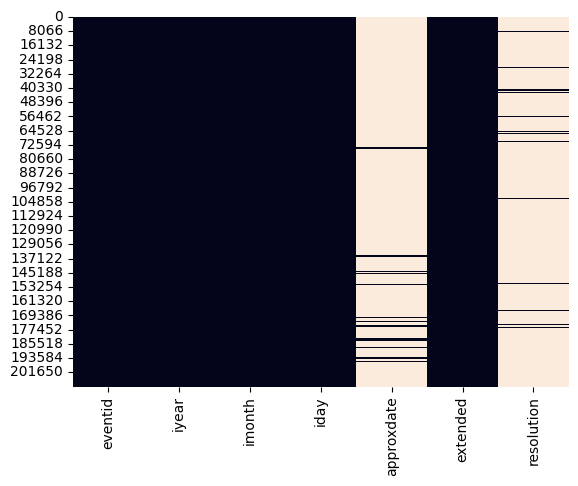

In [47]:
# missingness map
columnnames_date = ['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended', 'resolution']
missingness_map(df_terror, columnnames_date)

In [48]:
def clean_date(df):
    df_cleaned = df.drop(columns=['approxdate', 'extended', 'resolution'])

    # integer values
    df_cleaned.loc[df_cleaned['imonth'] == 0, 'imonth'] = None
    df_cleaned.loc[df_cleaned['iday'] == 0, 'iday'] = None

    return df_cleaned

print(df_terror.shape)
df_terror = clean_date(df_terror)
print(df_terror.shape)

(209706, 135)
(209706, 132)


## Incident Information

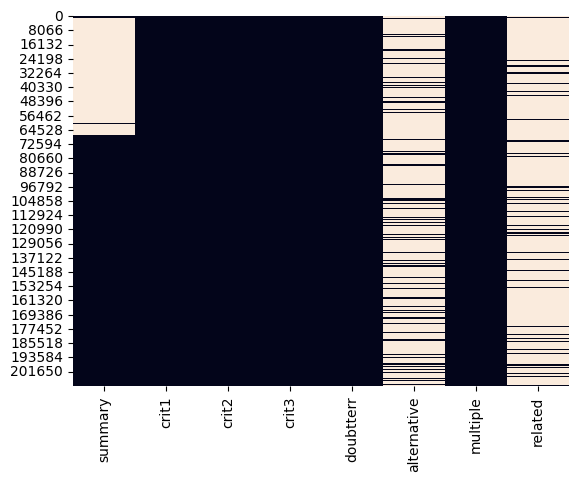

In [49]:
# missingness map
columnnames_incident_information = ['summary', 'crit1', 'crit2', 'crit3', 'doubtterr', 'alternative', 'multiple', 'related']
missingness_map(df_terror, columnnames_incident_information)

In [50]:
def clean_incident_information(df):
    df_cleaned = df.drop(columns=['doubtterr', 'alternative', 'alternative_txt'])

    # check all criterias are met
    criterion = lambda a, b, c: df_cleaned[(df_cleaned['crit1'] == a) & (df_cleaned['crit2'] == b) & (df_cleaned['crit3'] == c)].shape[0]
    assert (criterion(0, 0, 0) == 0 
            & criterion(1, 0, 0) == 0 
            & criterion(0, 1, 0) == 0 
            & criterion(0, 0, 1) == 0), 'At least 2 criterias must be satisfied'

    return df_cleaned

print(df_terror.shape)
df_terror = clean_incident_information(df_terror)
print(df_terror.shape)

(209706, 132)
(209706, 129)


## Incident Location

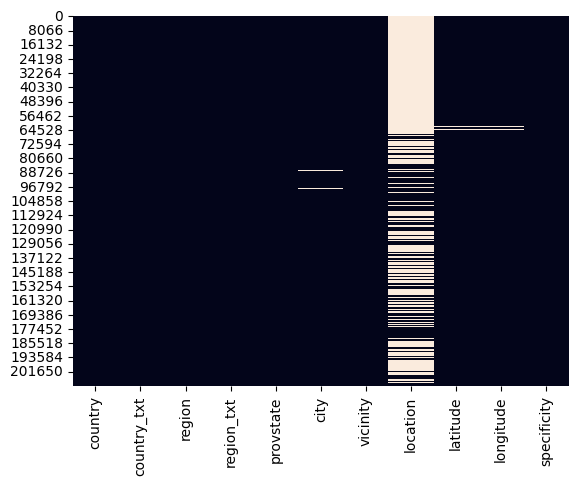

In [51]:
columnnames_incident_location = ['country', 'country_txt', 'region', 'region_txt', 'provstate', 
                                 'city', 'vicinity', 'location', 'latitude', 'longitude', 'specificity']
missingness_map(df_terror, columnnames_incident_location)

In [52]:
def clean_incident_location(df):
    df_cleaned = df.drop(columns=['vicinity', 'location', 'specificity'])

    # keep all attacks without location but set invalid location to None
    df_cleaned.loc[(df_cleaned['latitude'] < -90) | (df_cleaned['latitude'] > 90), 'latitude'] = None
    df_cleaned.loc[(df['longitude'] < -180) | (df_cleaned['longitude'] > 180), 'longitude'] = None

    return df_cleaned

print(df_terror.shape)
df_terror = clean_incident_location(df_terror)
print(df_terror.shape)

(209706, 129)
(209706, 126)


## Attack Information

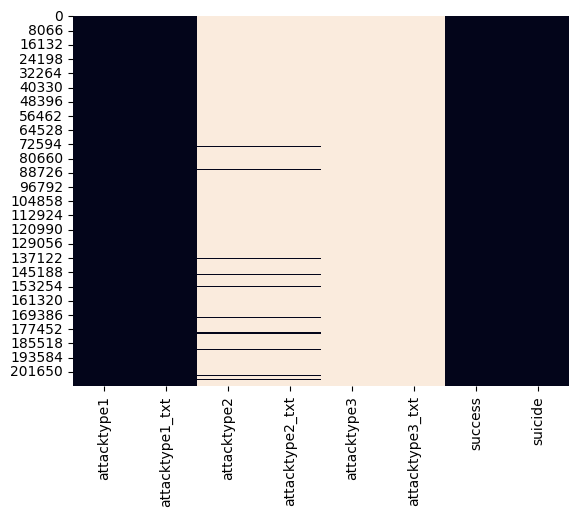

In [53]:
columnnames_attack_information = ['attacktype1', 'attacktype1_txt', 'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
                                  'success', 'suicide']
missingness_map(df_terror, columnnames_attack_information)

In [54]:
def clean_attack_information(df):
    df_cleaned = df.drop(columns=['attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt'])

    return df_cleaned

print(df_terror.shape)
df_terror = clean_attack_information(df_terror)
print(df_terror.shape)

(209706, 126)
(209706, 122)


## Weapon Information

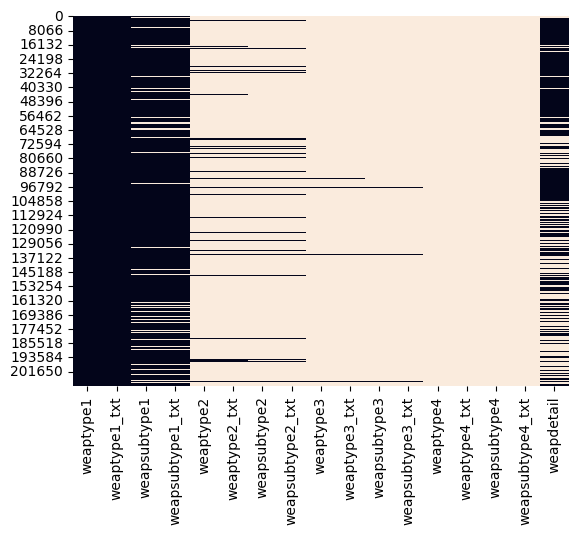

In [55]:
columnnames_weapon_information = ['weaptype1', 'weaptype1_txt', 'weapsubtype1', 'weapsubtype1_txt',
                                  'weaptype2', 'weaptype2_txt', 'weapsubtype2', 'weapsubtype2_txt',
                                  'weaptype3', 'weaptype3_txt', 'weapsubtype3', 'weapsubtype3_txt',
                                  'weaptype4', 'weaptype4_txt', 'weapsubtype4', 'weapsubtype4_txt',
                                  'weapdetail']
missingness_map(df_terror, columnnames_weapon_information)

In [56]:
def clean_weapon_information(df):
    df_cleaned = df.drop(columns=['weaptype2', 'weaptype2_txt', 'weapsubtype2', 'weapsubtype2_txt',
                                  'weaptype3', 'weaptype3_txt', 'weapsubtype3', 'weapsubtype3_txt',
                                  'weaptype4', 'weaptype4_txt', 'weapsubtype4', 'weapsubtype4_txt'])
    
    return df_cleaned

print(df_terror.shape)
df_terror = clean_weapon_information(df_terror)
print(df_terror.shape)

(209706, 122)
(209706, 110)


## Target Victim Information

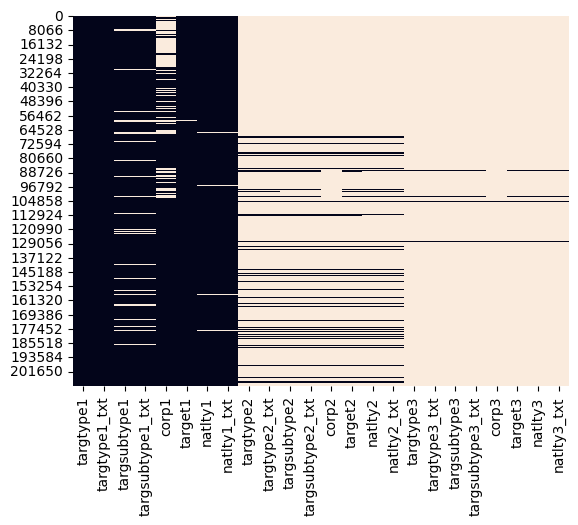

In [57]:
columnnames_target_victim_information = ['targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
                                         'corp1', 'target1', 'natlty1', 'natlty1_txt',
                                         'targtype2', 'targtype2_txt', 'targsubtype2', 'targsubtype2_txt',
                                         'corp2', 'target2', 'natlty2', 'natlty2_txt',
                                         'targtype3', 'targtype3_txt', 'targsubtype3', 'targsubtype3_txt',
                                         'corp3', 'target3', 'natlty3', 'natlty3_txt']
missingness_map(df_terror, columnnames_target_victim_information)

In [58]:
def clean_target_victim_information(df):
    df_cleaned = df.drop(columns=['targtype2', 'targtype2_txt', 'targsubtype2', 'targsubtype2_txt',
                                  'corp2', 'target2', 'natlty2', 'natlty2_txt',
                                  'targtype3', 'targtype3_txt', 'targsubtype3', 'targsubtype3_txt',
                                  'corp3', 'target3', 'natlty3', 'natlty3_txt'])
    return df_cleaned

print(df_terror.shape)
df_terror = clean_target_victim_information(df_terror)
print(df_terror.shape)

(209706, 110)
(209706, 94)


## Perpetrator Information

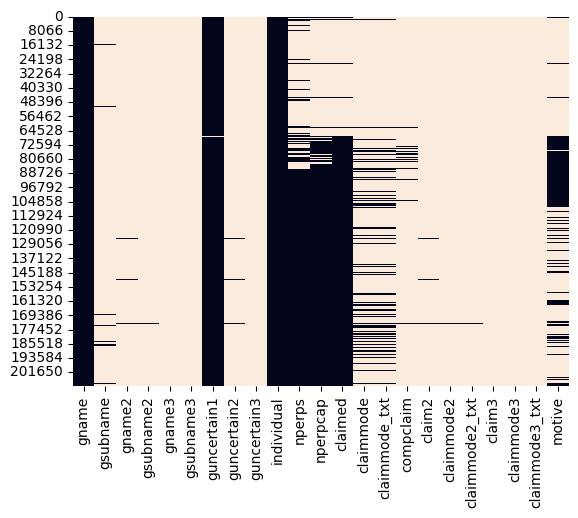

In [59]:
columnnames_perpetrator_information = ['gname', 'gsubname', 'gname2', 'gsubname2', 'gname3', 'gsubname3',
                                       'guncertain1', 'guncertain2', 'guncertain3', 'individual', 'nperps',
                                       'nperpcap', 'claimed', 'claimmode', 'claimmode_txt', 'compclaim',
                                       'claim2', 'claimmode2', 'claimmode2_txt', 
                                       'claim3', 'claimmode3', 'claimmode3_txt',
                                       'motive']
missingness_map(df_terror, columnnames_perpetrator_information)

In [60]:
def clean_perpetrator_information(df):
    df_cleaned = df.drop(columns=['gsubname', 'gname2', 'gsubname2', 'gname3', 'gsubname3', 'guncertain2', 'guncertain3',
                                  'compclaim', 'claim2', 'claimmode2', 'claimmode2_txt', 'claim3', 'claimmode3', 'claimmode3_txt'])
    
    # booleans
    # always 0 unless it's been proved to be claimed
    df_cleaned.loc[(df_cleaned['claimed'] == -9) | (df_cleaned['claimed'].isna()), 'claimed'] = 0

    # integer values
    df_cleaned.loc[(df_cleaned['nperps'] == -99) | (df_cleaned['nperps'] == -9), 'nperps'] = None
    df_cleaned.loc[(df_cleaned['nperpcap'] == -99) | (df_cleaned['nperpcap'] == -9), 'nperpcap'] = None

    return df_cleaned

print(df_terror.shape)
df_terror = clean_perpetrator_information(df_terror)
print(df_terror.shape)

(209706, 94)
(209706, 80)


## Casualities and Consequences

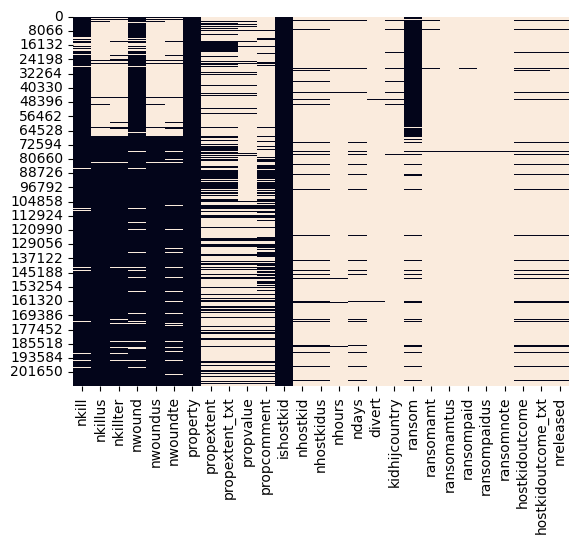

In [61]:
columnnames_casualities_and_consequences = ['nkill', 'nkillus', 'nkillter', 'nwound', 'nwoundus', 'nwoundte',
                                            'property', 'propextent', 'propextent_txt', 'propvalue', 'propcomment', 
                                            'ishostkid', 'nhostkid', 'nhostkidus', 'nhours', 'ndays', 
                                            'divert', 'kidhijcountry', 'ransom', 'ransomamt', 'ransomamtus', 
                                            'ransompaid', 'ransompaidus', 'ransomnote', 
                                            'hostkidoutcome', 'hostkidoutcome_txt', 'nreleased']
missingness_map(df_terror, columnnames_casualities_and_consequences)

In [62]:
def clean_casualities_and_consequences(df):
    df_cleaned = df.drop(columns=['nkillus', 'nwoundus', 'propcomment', 'nhostkidus', 'divert', 'kidhijcountry', 
                                  'ransomamtus', 'ransompaidus', 'ransomnote', 'hostkidoutcome', 'hostkidoutcome_txt'])
    
    # booleans
    df_cleaned.loc[(df_cleaned['property'] == -9) | (df_cleaned['property'].isna()), 'property'] = 0
    df_cleaned.loc[(df_cleaned['ishostkid'] == -9) | (df_cleaned['ishostkid'].isna()), 'ishostkid'] = 0
    df_cleaned.loc[(df_cleaned['ransom'] == -9) | (df_cleaned['ransom'].isna()), 'ransom'] = 0

    # integer values
    df_cleaned.loc[(df_cleaned['propvalue'] == -9) | (df_cleaned['propvalue'] == -99), 'propvalue'] = None
    df_cleaned.loc[(df_cleaned['nhostkid'] == -9) | (df_cleaned['nhostkid'] == -99), 'nhostkid'] = None
    df_cleaned.loc[(df_cleaned['nhours'] == -9) | (df_cleaned['nhours'] == -99), 'nhours'] = None
    df_cleaned.loc[(df_cleaned['ndays'] == -9) & (df_cleaned['ndays'] == -99), 'ndays'] = None
    df_cleaned.loc[(df_cleaned['ransomamt'] == -9) | (df_cleaned['ransomamt'] == -99), 'ransomamt'] = None
    df_cleaned.loc[(df_cleaned['ransompaid'] == -9) | (df_cleaned['ransompaid'] == -99), 'ransompaid'] = None

    # add column with total casualties
    df_cleaned['total_casualties'] = df_cleaned['nkill'] + df_cleaned['nwound']

    return df_cleaned

print(df_terror.shape)
df_terror = clean_casualities_and_consequences(df_terror)
print(df_terror.shape)

(209706, 80)
(209706, 70)


## Additional Information and Sources

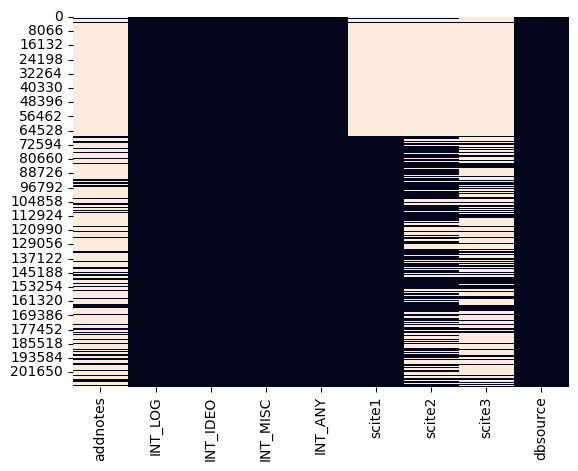

In [63]:
columnnames_additional_information_and_sources = ['addnotes', 'INT_LOG', 'INT_IDEO', 'INT_MISC', 'INT_ANY', 
                                                  'scite1', 'scite2', 'scite3', 'dbsource']
missingness_map(df_terror, columnnames_additional_information_and_sources)

In [64]:
def clean_additional_information_and_sources(df):
    df_cleaned = df.drop(columns=['INT_LOG', 'INT_IDEO', 'INT_MISC', 'INT_ANY', 
                                  'addnotes', 'scite2', 'scite3', 'dbsource'])

    return df_cleaned

print(df_terror.shape)
df_terror = clean_additional_information_and_sources(df_terror)
print(df_terror.shape)

(209706, 70)
(209706, 62)


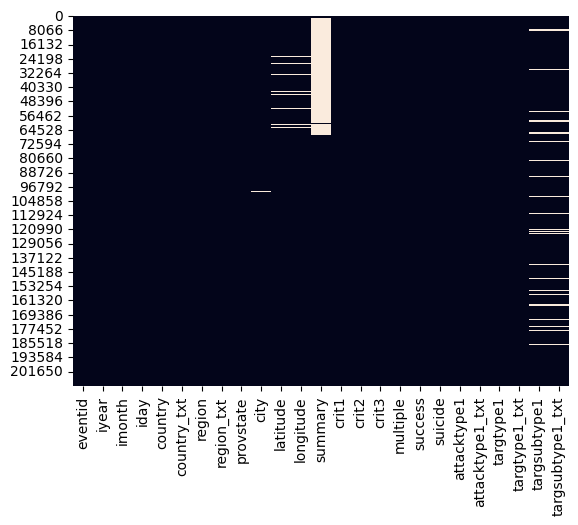

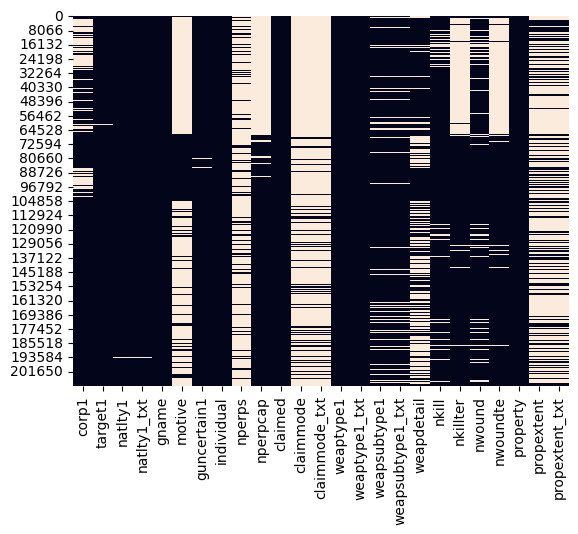

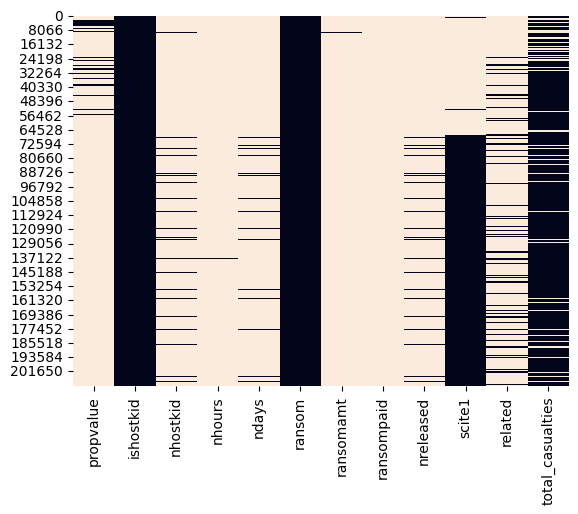

In [65]:
missingness_map(df_terror, list(df_terror.columns)[:25])
missingness_map(df_terror, list(df_terror.columns)[25:50])
missingness_map(df_terror, list(df_terror.columns)[50:])

# Country data

In [66]:
df_country = pd.read_csv(data_path + 'country_attributes.csv', low_memory=False, na_values='..')

# pivot all year columns to one year column and one series column to separate series columns
df_country = (df_country.melt(id_vars=['Country Name', 'Series Name'], var_name='year')
              .assign(year=lambda x: x['year'].str.extract('(\d+)', expand=False))
              .pivot_table(index=['Country Name', 'year'], columns='Series Name', values='value', aggfunc='first')
              .reset_index())

print(df_country.columns)
# drop population series
df_country = df_country.drop(columns=['Population, total'])

# set years as ints
df_country['year'] = df_country['year'].astype(int)

# subset the year range to the same as terror
df_country = df_country[(df_country['year'] >= 1970) & (df_country['year'] <= 2020)]

df_country = df_country.reset_index(drop=True)

Index(['Country Name', 'year', 'Control of Corruption: Estimate',
       'GDP per capita (current US$)',
       'Political Stability and Absence of Violence/Terrorism: Estimate',
       'Population, total',
       'Unemployment, total (% of total labor force) (national estimate)'],
      dtype='object', name='Series Name')


<>:5: SyntaxWarning: invalid escape sequence '\d'
<>:5: SyntaxWarning: invalid escape sequence '\d'
/var/folders/93/9bwp5y9s6p925yjm6qkgky980000gn/T/ipykernel_18400/4186182776.py:5: SyntaxWarning: invalid escape sequence '\d'
  .assign(year=lambda x: x['year'].str.extract('(\d+)', expand=False))


In [67]:
print(df_country.shape)
df_country

(13495, 6)


Series Name,Country Name,year,Control of Corruption: Estimate,GDP per capita (current US$),Political Stability and Absence of Violence/Terrorism: Estimate,"Unemployment, total (% of total labor force) (national estimate)"
0,Afghanistan,1970,NaN,NaN,NaN,NaN
1,Afghanistan,1971,NaN,NaN,NaN,NaN
2,Afghanistan,1972,NaN,NaN,NaN,NaN
3,Afghanistan,1973,NaN,NaN,NaN,NaN
4,Afghanistan,1974,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
13490,Zimbabwe,2016,-1.288441,1421.787791,-0.62081,NaN
13491,Zimbabwe,2017,-1.298485,1192.107012,-0.710431,NaN
13492,Zimbabwe,2018,-1.246001,2269.177012,-0.721038,NaN
13493,Zimbabwe,2019,-1.27119,1421.868596,-0.943286,7.373


## Population data

In [68]:
df_pop = pd.read_csv(data_path + 'population.csv', low_memory=False)

# subset year range to same as terror
df_pop = df_pop[(df_pop['Year'] >= 1970) & (df_pop['Year'] <= 2020)]

df_pop = df_pop.reset_index(drop=True)

# rename columns
df_pop = df_pop.rename(columns={'Entity':'country', 'Code':'country_code', 'Year':'year', 'Population - Sex: all - Age: all - Variant: estimates':'population_estimate'})

In [69]:
print(df_pop.shape)
df_pop

(13056, 4)


,country,country_code,year,population_estimate
0,Afghanistan,AFG,1970,11290135
1,Afghanistan,AFG,1971,11567672
2,Afghanistan,AFG,1972,11853697
3,Afghanistan,AFG,1973,12158000
4,Afghanistan,AFG,1974,12469127
...,...,...,...,...
13051,Zimbabwe,ZWE,2016,14600297
13052,Zimbabwe,ZWE,2017,14812484
13053,Zimbabwe,ZWE,2018,15034457
13054,Zimbabwe,ZWE,2019,15271377


In [70]:
print(df_country['Country Name'].unique().shape)
print(df_pop['country'].unique().shape)

(265,)
(256,)


## Specifying current countries countries

In [71]:
import pycountry as pyc

# define all world countries
countries = df_pop['country'].unique()

# remove non countries
remove_non_countries = ['Africa (UN)', 'Asia (UN)', 'Europe (UN)', 'Latin America and the Caribbean (UN)', 'Northern America (UN)', 'Americas (UN)', 'Oceania (UN)',
                        'Land-locked developing countries (LLDC)', 'Least developed countries', 'Less developed regions', 'Less developed regions, excluding China',
                        'Less developed regions, excluding least developed countries', 'Low-income countries', 'Lower-middle-income countries',
                        'Small island developing states (SIDS)', 'Upper-middle-income countries', 'World', 'High-income countries', 'More developed regions']

# remove non countries from population data
df_pop = df_pop[~df_pop['country'].isin(remove_non_countries)].reset_index(drop=True)

# define 
countries = df_pop['country'].unique()

In [72]:
# check if naming in df_terror is consistent with list
for country in countries:
    if df_terror[df_terror['country_txt'] == country].shape[0] == 0:
       #print(country)
        pass


# correct naming in df_terror
corrections = [('Bosnia and Herzegovina', 'Bosnia-Herzegovina'), 
               ('Cote d\'Ivoire', 'Ivory Coast'), 
               ('Czechia', 'Czech Republic'),
               ('Democratic Republic of Congo', 'Democratic Republic of the Congo'),
               ('Eswatini', 'Swaziland'),
               ('Macao', 'Macau'),
               ('North Macedonia', 'Macedonia'),
               ('Palestine', 'West Bank and Gaza Strip'),
               ('Saint Kitts and Nevis', 'St. Kitts and Nevis'),
               ('Saint Lucia', 'St. Lucia'),
               ('Slovakia', 'Slovak Republic'),
               ('Vatican', 'Vatican City'),
               ('Congo', 'Republic of the Congo'),
               ('Democratic Republic of Congo', 'Zaire'),
               ('Vanuatu', 'New Hebrides'),
               ('East Germany (Former)', 'East Germany (GDR)'),
               ('West Germany (Former)', 'West Germany (FRG)'),
               ('South Yemen (Former)', 'South Yemen'),
               ('Czechoslovakia (Former)', 'Czechoslovakia'),
               ('People\'s Republic of the Congo (Former)', 'People\'s Republic of the Congo'),
               ('Yugoslavia (Former)', 'Yugoslavia'),
               ('North Yemen (Former)', 'North Yemen'),
               ('Rhodesia (Former)', 'Rhodesia'),
               ('Soviet Union (Former)', 'Soviet Union'),
               ('Serbia-Montenegro (Former)', 'Serbia-Montenegro')]

for correction, wrong in corrections:
    df_terror.loc[df_terror['country_txt'] == wrong, 'country_txt'] = correction

# check that countries in terror not in official country list, are countries that don't exists
for country in df_terror['country_txt'].unique():
    if not country in countries:
        print(country)
        pass

East Germany (Former)
West Germany (Former)
South Yemen (Former)
Czechoslovakia (Former)
People's Republic of the Congo (Former)
Yugoslavia (Former)
North Yemen (Former)
Rhodesia (Former)
Soviet Union (Former)
International
Serbia-Montenegro (Former)


In [73]:
# define list of countries with flags
countries_flags = list(pyc.countries)

countries_flags_names = []
countries_flags_flags = []
for flag in countries_flags:
    countries_flags_names.append(flag.name)
    countries_flags_flags.append(flag.flag)


# check if naming in countries_flags is consistent with list
for country in countries:
    temp = [c.name for c in countries_flags]
    if country not in temp:
        #print(country)
        pass

# correct naming in countries_flags
corrections = [('Bolivia', 'Bolivia, Plurinational State of'),
               ('Bonaire Sint Eustatius and Saba', 'Bonaire, Sint Eustatius and Saba'),
               ('British Virgin Islands', 'Virgin Islands, British'),
               ('Brunei', 'Brunei Darussalam'),
               ('Cape Verde', 'Cabo Verde'),
               ('Cote d\'Ivoire', 'Côte d\'Ivoire'),
               ('Curacao', 'Curaçao'),
               ('Democratic Republic of Congo', 'Congo, The Democratic Republic of the'),
               ('East Timor', 'Timor-Leste'),
               ('Falkland Islands', 'Falkland Islands (Malvinas)'),
               ('Iran', 'Iran, Islamic Republic of'),
               ('Micronesia (country)', 'Micronesia, Federated States of'),
               ('Moldova', 'Moldova, Republic of'),
               ('North Korea', 'Korea, Democratic People\'s Republic of'),
               ('Palestine', 'Palestine, State of'),
               ('Reunion', 'Réunion'),
               ('Russia', 'Russian Federation'),
               ('Saint Barthelemy', 'Saint Barthélemy'),
               ('Saint Helena', 'Saint Helena, Ascension and Tristan da Cunha'),
               ('South Korea', 'Korea, Republic of'),
               ('Syria', 'Syrian Arab Republic'),
               ('Taiwan', 'Taiwan, Province of China'),
               ('Tanzania', 'Tanzania, United Republic of'),
               ('Turkey', 'Türkiye'),
               ('United States Virgin Islands', 'Virgin Islands, U.S.'),
               ('Vatican', 'Holy See (Vatican City State)'),
               ('Venezuela', 'Venezuela, Bolivarian Republic of'),
               ('Vietnam', 'Viet Nam'),
               ('Laos', 'Lao People\'s Democratic Republic')]


for correction, wrong in corrections:
    for i, name in enumerate(countries_flags_names):
        if name == wrong:
            countries_flags_names[i] = correction
            #print(name, correction)


# append missing flags
missing_country_flags = [('Kosovo', '🇽🇰')]
for missing_country, missing_flag in missing_country_flags:
    countries_flags_names.append(missing_country)
    countries_flags_flags.append(missing_flag)


# check if we have flags for countries not in official country list
for country in countries_flags_names:
    if country not in countries:
        print(country)
        pass

Åland Islands
Antarctica
French Southern Territories
Bouvet Island
Cocos (Keeling) Islands
Christmas Island
Heard Island and McDonald Islands
British Indian Ocean Territory
Norfolk Island
Pitcairn
South Georgia and the South Sandwich Islands
Svalbard and Jan Mayen
United States Minor Outlying Islands


In [74]:
# check if naming in df_country is consistent with list


# correct naming in df_country

In [75]:
# official country list from df_pop
df_countries = pd.DataFrame({'country':countries})

# all flags
df_flags = pd.DataFrame({'country':countries_flags_names, 'flag':countries_flags_flags})

# flags for official conuntries
df_countries_flags = df_countries.merge(right=df_flags, how='left', on='country')
df_countries_flags

,country,flag
0,Afghanistan,🇦🇫
1,Albania,🇦🇱
2,Algeria,🇩🇿
3,American Samoa,🇦🇸
4,Andorra,🇦🇩
...,...,...
232,Wallis and Futuna,🇼🇫
233,Western Sahara,🇪🇭
234,Yemen,🇾🇪
235,Zambia,🇿🇲


In [76]:
# merge flag into terror and drop duplicated join column country_y
df_terror_flag = df_terror.merge(right=df_countries_flags, how='left', left_on='country_txt', right_on='country', suffixes=('','_y')).drop(columns=['country_y'])

# check that only former countries and international are missing flags and set flag to empty string
print('missing flags:', df_terror_flag[df_terror_flag['flag'].isna()]['country_txt'].unique())
df_terror_flag['flag'] = df_terror_flag['flag'].fillna('')

# set flag datatype as string
df_terror_flag['flag'] = df_terror_flag['flag'].astype(str)

missing flags: ['East Germany (Former)' 'West Germany (Former)' 'South Yemen (Former)'
 'Czechoslovakia (Former)' "People's Republic of the Congo (Former)"
 'Yugoslavia (Former)' 'North Yemen (Former)' 'Rhodesia (Former)'
 'Soviet Union (Former)' 'International' 'Serbia-Montenegro (Former)']


In [77]:
# manually add population data for former countries
# source Wikipedia/Statista, value in millions
former_populations = [('East Germany (Former)', [(1970, 17.068), (1971, 17.054), (1972, 17.011), (1973, 16.951), (1974, 16.891),
                                                 (1975, 16.820), (1976, 16.767), (1977, 16.758), (1978, 16.751), (1979, 16.740),
                                                 (1980, 16.740), (1981, 16.706), (1982, 16.702), (1983, 16.701), (1984, 16.660),
                                                 (1985, 16.640), (1986, 16.640), (1987, 16.661), (1988, 16.675), (1989, 16.434),
                                                 (1990, 16.028)]
                      ),
                      ('West Germany (Former)', [(1970, 61.001), (1971, 61.503), (1972, 61.809), (1973, 62.101), (1974, 61.991),
                                                 (1975, 61.645), (1976, 61.442), (1977, 61.353), (1978, 61.322), (1979, 61.439),
                                                 (1980, 61.658), (1981, 61.713), (1982, 61.546), (1983, 61.307), (1984, 61.049),
                                                 (1985, 61.020), (1986, 61.140), (1987, 61.238), (1988, 61.715), (1989, 62.679),
                                                 (1990, 63.726)]
                      ),
                      ('South Yemen (Former)', [(year, 2.2) for year in range(1970, 1990+1)]
                      ),
                      ('Czechoslovakia (Former)', [(1970, 14.35), (1971, 14.35), (1972, 14.35), (1973, 14.35), (1974, 14.35),
                                                   (1975, 14.35), (1976, 14.35), (1977, 14.35), (1978, 14.35), (1979, 14.35),
                                                   (1980, 14.35), (1981, 14.35), (1982, 14.35), (1983, 14.35), (1984, 14.35),
                                                   (1985, 14.35), (1986, 14.35), (1987, 14.35), (1988, 14.35), (1989, 14.35), 
                                                   (1990, 15.69), (1991, 15.69), (1992, 15.69)]
                      ),
                      ('People\'s Republic of the Congo (Former)', [(year, 2.153) for year in range(1970, 1992+1)]
                      ),
                      ('Yugoslavia (Former)', [(1970, 19.489), (1971, 19.489), (1972, 19.489), (1973, 19.489), (1974, 19.489),
                                               (1975, 21.441), (1976, 21.441), (1977, 21.441), (1978, 21.441), (1979, 21.441),
                                               (1980, 21.441), (1981, 21.441), (1982, 21.441), (1983, 21.441), (1984, 21.441),
                                               (1985, 23.121), (1986, 23.121), (1987, 23.121), (1988, 23.121), (1989, 23.121),
                                               (1990, 23.121), (1991, 23.532)]
                      ),
                      ('North Yemen (Former)', [(year, 7.94-2.2) for year in range(1970, 1990+1)]
                      ),
                      ('Rhodesia (Former)', [(year, 6.930) for year in range(1970, 1980+1)]
                      ), 
                      ('Soviet Union (Former)', [(1970, 241.720), (1971, 243.950), (1972, 246.254), (1973, 248.613), (1974, 250.865),
                                                 (1975, 253.279), (1976, 255.463), (1977, 257.892), (1978, 260.125), (1979, 262.436),
                                                 (1980, 264.530), (1981, 266.629), (1982, 268.841), (1983, 271.227), (1984, 273.769), 
                                                 (1985, 276.310), (1986, 278.845), (1987, 281.537), (1988, 284.049), (1989, 286.731), 
                                                 (1990, 288.624), (1991, 290.034)]
                      ),
                      ('Serbia-Montenegro (Former)', [(1992, 10.389), (1993, 10.390), (1994, 10.392), (1995, 10.393), (1996, 10.398),
                                                      (1997, 10.399), (1998, 10.304), (1999, 10.214), (2000, 10.128), (2001, 10.057),
                                                      (2002, 9.996), (2003, 9.919), (2004, 9.842), (2005, 9.798), (2006, 9.746)]
                      ),
                      ('International', [(year, None) for year in range(1970, 2020+1)]
                      )
]

for country, pop_list in former_populations:
    years, pop_estimate = map(list, zip(*pop_list))
    pop_estimate = [1000000*pop if pop is not None else None for pop in pop_estimate]
    temp = pd.DataFrame({'country':country, 'country_code':None, 'year':years, 'population_estimate':pop_estimate})
    df_pop = pd.concat([df_pop, temp], ignore_index=True)

# check all countries in terror has entries in population data
for c in df_terror_flag['country_txt'].unique():
    if c not in df_pop['country'].unique():
        print(c)

/var/folders/93/9bwp5y9s6p925yjm6qkgky980000gn/T/ipykernel_18400/1635397928.py:53: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_pop = pd.concat([df_pop, temp], ignore_index=True)


In [78]:
# save terror
df_terror_flag.to_csv(data_path + 'globalterrorism_2020_cleaned.csv')

# save population
df_pop.to_csv(data_path + 'population_cleaned.csv')

# save countries with flags
df_countries_flags.to_csv(data_path + 'countries_flags_cleaned.csv')

# save country data
#...